<a href="https://colab.research.google.com/github/AkshayHattangdi/test-repo/blob/master/TECH27_AkshayHattangdi_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1/20) Walmart Store Optimization

## *A Machine Learning Pipeline to Improve Walmart's Store Performance*


# (2/20) Team Members & Roles

Architect, Analyst & Report Author: Akshay Hattangdi


# (3/20) Problem Statement

*what problem you’re solving and why it matters*

This project addresses 2 business-critical questions that frequently arise in the retail industry while meeting broader learning objectives of applying and interpreting fundamental machine learning techniques. Namely,

*   How much will a store sell?
> Regression

*   Is a store high-performing or low-performing?
> Classification

These answers are essential for managing store fleets effectively and help retailers, like Walmart, gain a competitive advantage by improving outcomes related to strategic planning, resource allocation, and operational performance.


# (4/20) Objectives and Goals

*clear, measurable goals*

Primary objectives and accompanying goals of this project are as follows:

*   Forecast accuracy of weekly sales by store as measured by MSE
> High R^2

*   Accuracy of classifying stores by high-performing or low-performing
> High F1 score


# (5/20) Methodology
*finalized tools, platforms, and approach*

## Tools
The following libraries were leveraged to perform various analytics:

*   Data Processing - NumPy, Pandas
*   Deep Learning - Keras, PyTorch, TensorFlow
*   Machine Learning - Scikit-learn, LightGBM, XGBoost
*   Statistics - SciPy, Statsmodels, SymPy
*   System Interface - OS
*   Visualization - Matplotlib, Plotly, Seaborn


## Platform
Work for this project was conducted in Google Colab using Python 3.12.11.


## Approach
This project utilized the CRISP-DM framework to plan and execute various phases of business understanding, data understanding, data preparation, modeling, evaluation, and deployment. Data considerations and model progression deliberately emphasised simplicity over complexity in evaluation methodology.


In [2]:
"""
Section: (5/20) Methodology
"""

# Python version
!python --version

Python 3.12.11


# (6/20) Dataset(s)
*(source, type, size, and justification)*

## Source
Chowdhury, Ujjwal (2022). Walmart Cleaned Data. Kaggle. https://www.kaggle.com/datasets/ujjwalchowdhury/walmartcleaned


## Type
The dataset for this analytic report is comprised of 1 CSV file that captures historical sales for 45 anonymized stores of Walmart between 2010-02-05 to 2012-11-01 and comprises the following columns:

NO.  | COLUMN NAME   | DATA TYPE | COLUMN/FIELD DEFINITION
1.   |`Unnamed: 0`   | Integer   | Index
2.   |`Store`.       | Integer   | Store number
3.   |`Date`         | DateTime  | Week of sales
4.   |`IsHoliday`    | Integer   | 1 if Week is a holiday, 0 otherwise
5.   |`Dept`         | Decimal   | Department number
6.   |`Weekly_Sales` | Decimal   | Weekly sales for given store-week in USD
7.   |`Temperature`  | Decimal   | Temperature on day of sale in degrees Celsius
8.   |`Fuel_Price`   | Decimal   | Cost of fuel in store region in USD
9.   |`MarkDown1`    | Decimal   | Pricing initiative 1
10.  |`MarkDown2`    | Decimal   | Pricing initiative 2
11.  |`MarkDown3`    | Decimal   | Pricing initiative 3
12.  |`MarkDown4`    | Decimal   | Pricing initiative 4
13.  |`MarkDown5`    | Decimal   | Pricing initiative 5
14.  |`CPI`          | Decimal   | Prevailing consumer price index
15.  |`Unemployment` | Decimal   | Prevailing unemployment rate
16.  |`Type`         | Integer   | Type of store
17.  |`Size`         | Integer   | Size of store

The following weeks are holidays when markdowns are applied to increase sales:

*   Super Bowl - 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
*   Labor Day - 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
*   Thanksgiving - 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
*   Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

`Weekly_Sales` is the dependent target variable in this data.


## Size
The dataset is ~42.03 MB (42,026,988 bytes) constituting 421,570 rows and 17 columns.


## Justification
Outside of receiving a high score of 10/10 for usability on Kaggle and an overall Bronze rating for credibility, this dataset was selected for this project for its completeness. The large, time-series sample drawn from real-world observations allows for robust statistical analysis. Furthermore, the features that span internal actions in the form of markdowns and external factors in the form of CPI, fuel price, and unemployment enables richer optionality for feature engineering with application of a range of models.


In [3]:
"""
Section: (6/20) Datasets
"""
"""
# load dataset into Google Colab
from google.colab import files
uploaded = files.upload()
"""
# load data into df
import pandas as pd
df = pd.read_csv('walmart_cleaned.csv')

# print shape of df
print('\nShape\n', df.shape)

# print data types of df
print('\nData Types\n', df.dtypes)

# print a sample of 5 rows of df
print('\nSample\n', df.head())

# print file size of df
import os
print('\nFile Size\n', os.path.getsize('walmart_cleaned.csv'), 'bytes')


Shape
 (421570, 17)

Data Types
 Unnamed: 0        int64
Store             int64
Date             object
IsHoliday         int64
Dept            float64
Weekly_Sales    float64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type              int64
Size              int64
dtype: object

Sample
    Unnamed: 0  Store        Date  IsHoliday  Dept  Weekly_Sales  Temperature  \
0           0      1  2010-02-05          0   1.0      24924.50        42.31   
1           1      1  2010-02-05          0  26.0      11737.12        42.31   
2           2      1  2010-02-05          0  17.0      13223.76        42.31   
3           3      1  2010-02-05          0  45.0         37.44        42.31   
4           4      1  2010-02-05          0  28.0       1085.29        42.31   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDo

# (7/20) Block Diagram / System Architecture
*updated pipeline visualization*


In [4]:
"""
Section: (7/20) Block Diagram
"""
"""
+------------------+     +--------------------+     +-------------------+     +-------------------+     +-------------------+
|  Data Source      | --> | Data Preprocessing | --> | Model Training   | --> | Model Evaluation  | --> | Model Deployment  |
|   & Storage       |     |                    |     | (Algorithm       |     | (Metrics)         |     |                   |
| (Raw Data Sources)|     | (Cleaning, Feature |     | Selection        |     |                   |     |                   |
|                   |     | Engineering, Split)|     |                  |     |                   |     |                   |
+------------------+     +--------------------+     +-------------------+     +-------------------+     +-------------------+

"""

pass

# (8/20) Data Visualization & EDA of Target with Features
*key insights from exploration & preprocessing*


## 8.1/ Weekly sales distribution

*   Target variable, `Weekly_Sales`

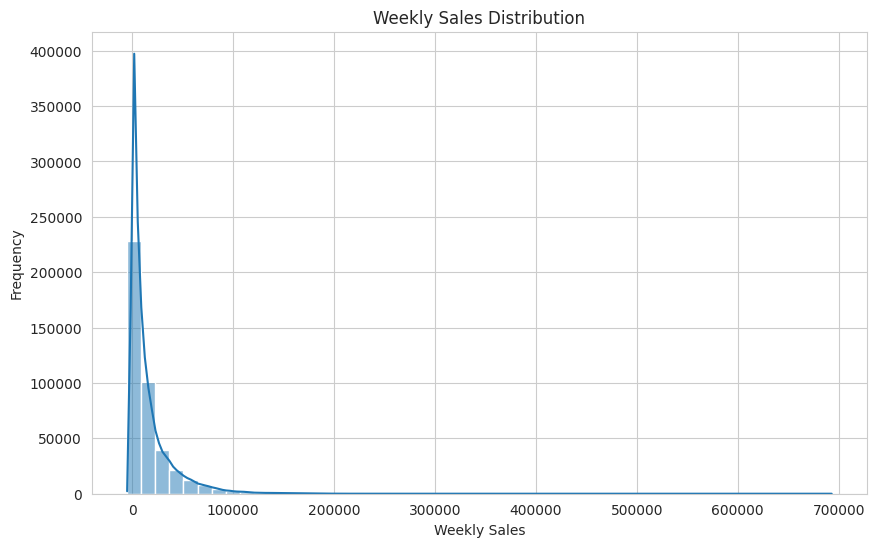


Weekly Sales Descriptive Stats
 count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

Median Weekly Sales
 7612.03


In [5]:
"""
Section: (8.1/20) Weekly sales distribution
"""
# plot weekly sales distribution
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Weekly Sales Distribution')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

# descriptive stats for sales distribution
print('\nWeekly Sales Descriptive Stats\n', df['Weekly_Sales'].describe())

# print median weekly sales
print('\nMedian Weekly Sales\n', df['Weekly_Sales'].median())

## 8.2/ Data ranges of independent features by feature category (time, store, external, pricing)

*   `Dates`
*   `Store`
*   `Store Type`
*   `Store Size`
*   `Department`
*   `CPI`
*   `Fuel Price`
*   `Temperature`
*   `Unemployment`
*   `Markdown 1-5`



In [6]:
"""
Section: (8.2/20) Data ranges of features
"""
# data ranges for independent features
print('\nDate Range\n', df['Date'].min(), '-', df['Date'].max())
print('-----')
print('\nStore Range\n', df['Store'].min(), '-', df['Store'].max())
print('\nStore Type Range\n', df['Type'].min(), '-', df['Type'].max())
print('\nStore Size Range\n', df['Size'].min(), '-', df['Size'].max())
print('\nDept Range\n', df['Dept'].min(), '-', df['Dept'].max())
print('-----')
print('\nCPI Range\n', df['CPI'].min(), '-', df['CPI'].max())
print('\nFuel Price Range\n', df['Fuel_Price'].min(), '-', df['Fuel_Price'].max())
print('\nTemperature Range\n', df['Temperature'].min(), '-', df['Temperature'].max())
print('\nUnemployment Range\n', df['Unemployment'].min(), '-', df['Unemployment'].max())
print('-----')
print('\nMarkdown 1 Range\n', df['MarkDown1'].min(), '-', df['MarkDown1'].max())
print('\nMarkdown 2 Range\n', df['MarkDown2'].min(), '-', df['MarkDown2'].max())
print('\nMarkdown 3 Range\n', df['MarkDown3'].min(), '-', df['MarkDown3'].max())
print('\nMarkdown 4 Range\n', df['MarkDown4'].min(), '-', df['MarkDown4'].max())
print('\nMarkdown 5 Range\n', df['MarkDown5'].min(), '-', df['MarkDown5'].max())



Date Range
 2010-02-05 - 2012-10-26
-----

Store Range
 1 - 45

Store Type Range
 1 - 3

Store Size Range
 34875 - 219622

Dept Range
 1.0 - 99.0
-----

CPI Range
 126.064 - 227.2328068

Fuel Price Range
 2.472 - 4.468

Temperature Range
 -2.06 - 100.14

Unemployment Range
 3.879 - 14.313
-----

Markdown 1 Range
 0.0 - 88646.76

Markdown 2 Range
 -265.76 - 104519.54

Markdown 3 Range
 -29.1 - 141630.61

Markdown 4 Range
 0.0 - 67474.85

Markdown 5 Range
 0.0 - 108519.28


## 8.3/ Weekly sales by store-level feature category

*   Weekly Sales by `Store`
*   Weekly Sales by `Store Type`
*   Weekly Sales by `Store Size`
*   Weekly Sales by `Department`


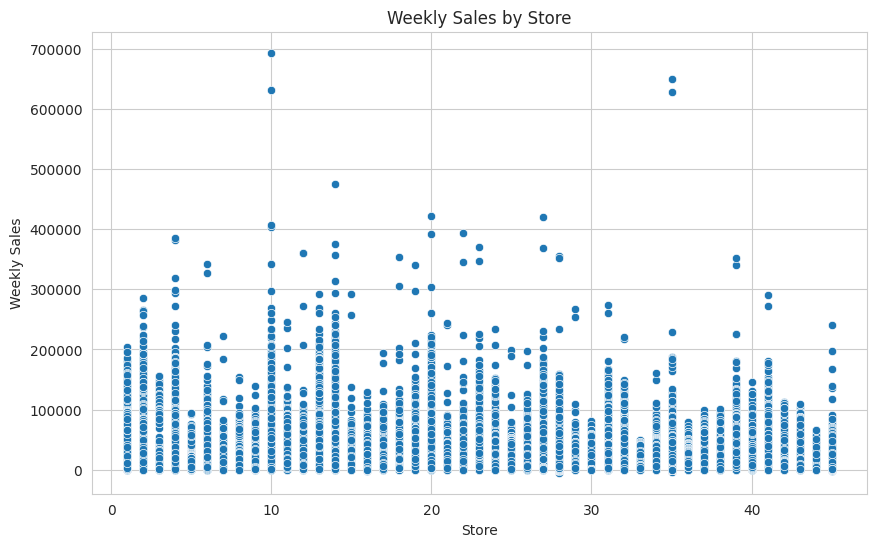

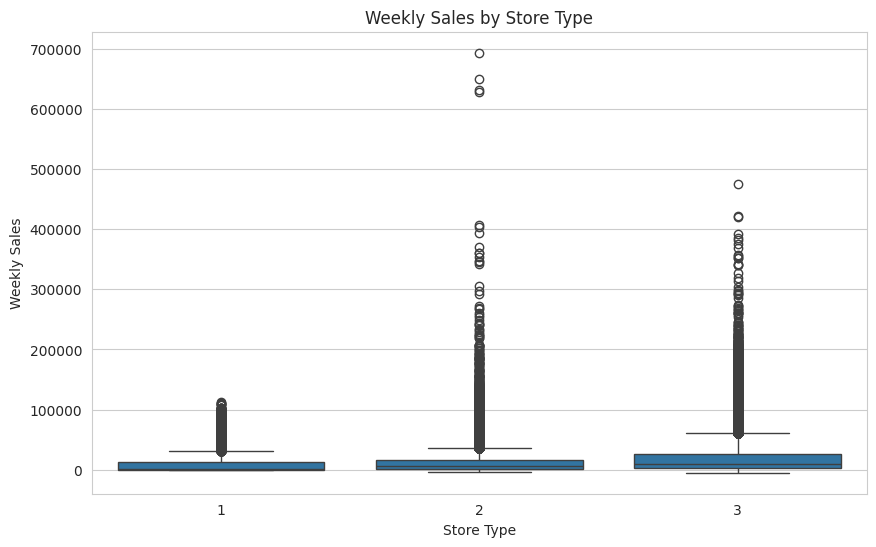

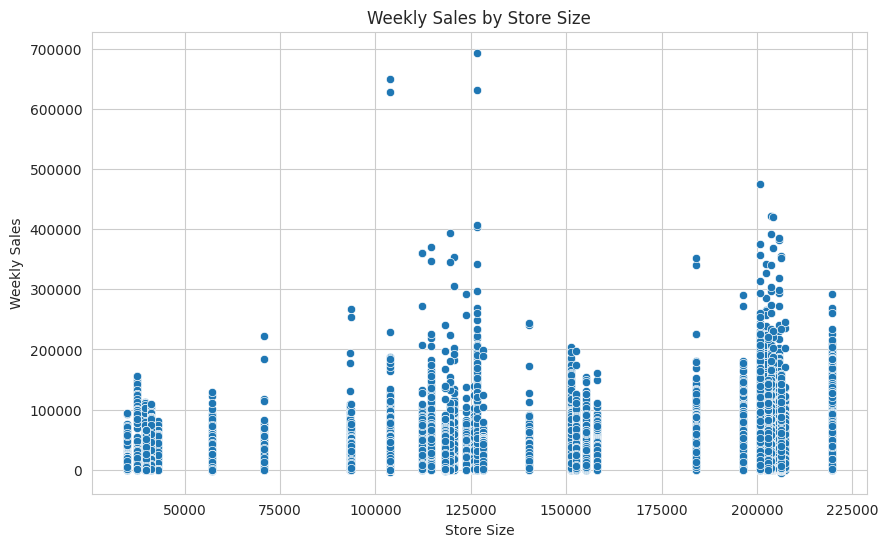

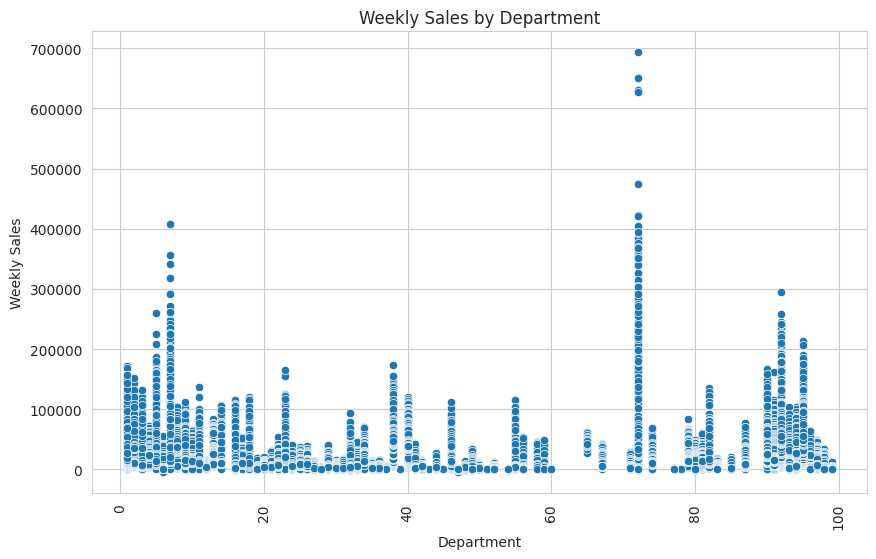

In [7]:
"""
Section: (8.3/20) Weekly sales by store-level feature category
"""
# plot weekly sales by store
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Store', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()

# plot weekly sales by store type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.show()

# plot weekly sales by store size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Store Size')
plt.xlabel('Store Size')
plt.ylabel('Weekly Sales')
plt.show()

# plot weekly sales by department
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dept', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Department')
plt.xlabel('Department')
plt.xticks(rotation=90)
plt.ylabel('Weekly Sales')
plt.show()

## 8.4/ Weekly sales by external features

*   Weekly Sales by `CPI`
*   Weekly Sales by `Fuel_Price`
*   Weekly Sales by `Temperature`
*   Weekly Sales by `Unemployment`


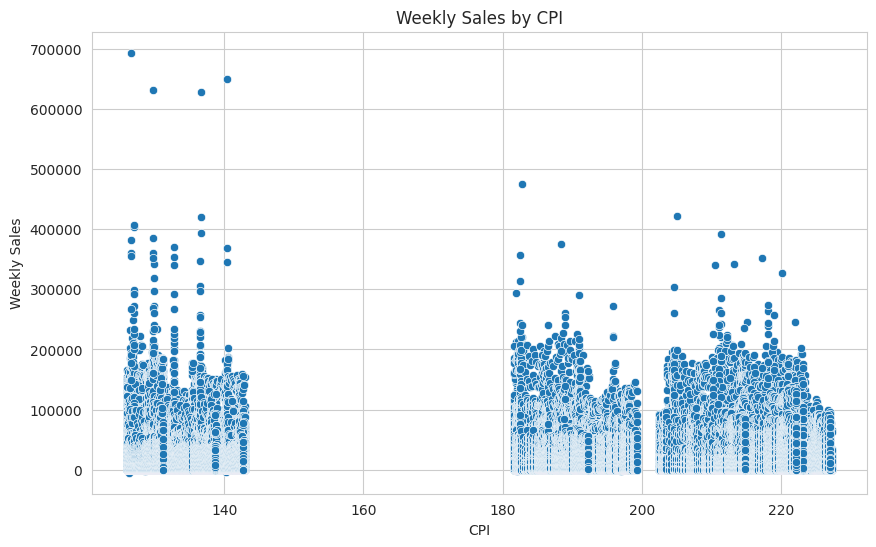

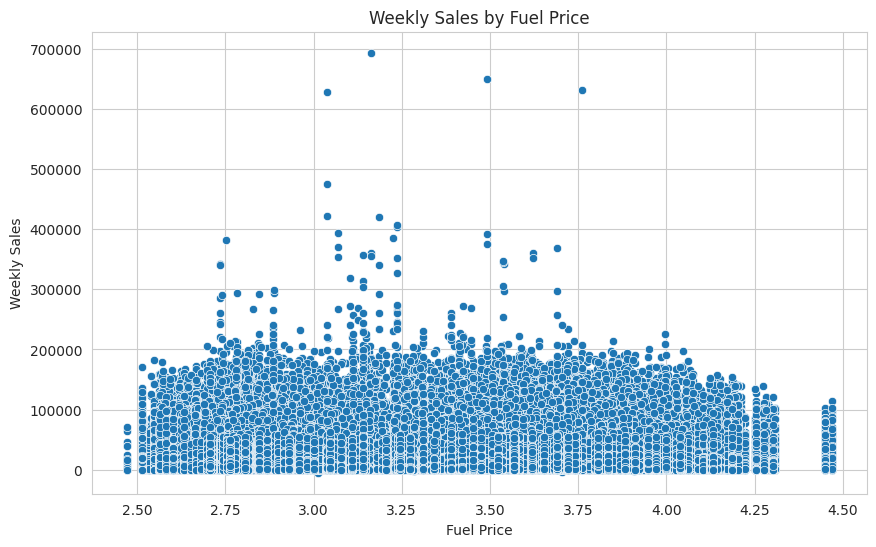

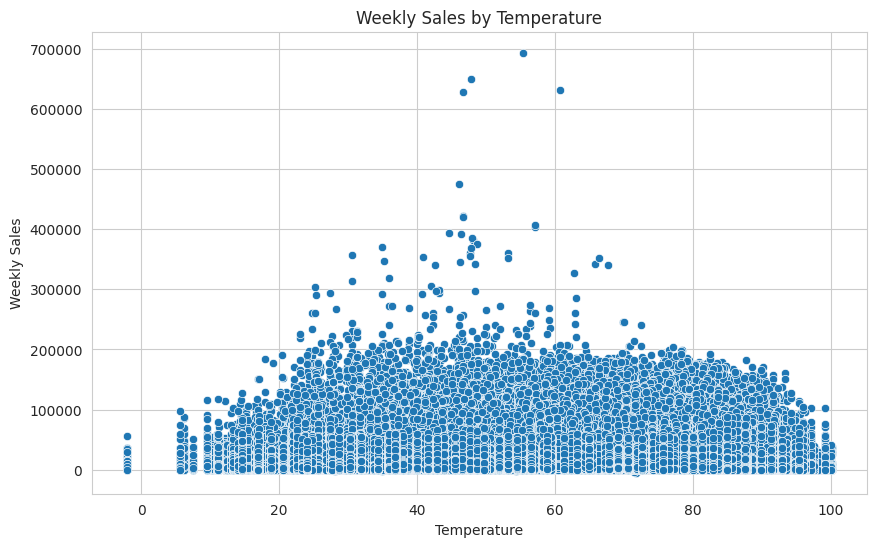

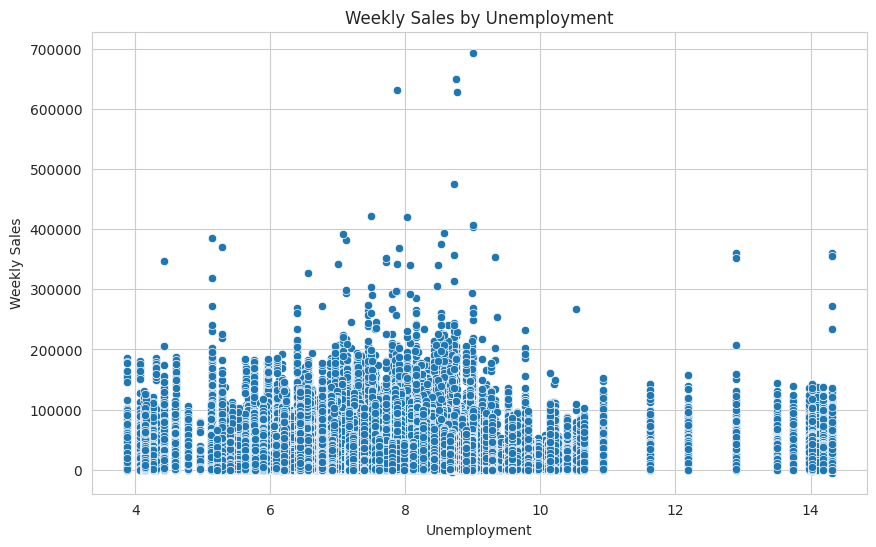

In [8]:
"""
Section: (8.4/20) Weekly sales by external features
"""
# plot weekly sales by cpi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by CPI')
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()

# plot weekly sales by fuel price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Fuel Price')
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')

# plot weekly sales by temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')

# plot weekly sales by unemployment
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Unemployment')
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.show()

## 8.5/ Weekly sales by markdown features

*   Weekly sales by `MarkDown1`
*   Weekly sales by `MarkDown2`
*   Weekly sales by `MarkDown3`
*   Weekly sales by `MarkDown4`
*   Weekly sales by `MarkDown5`


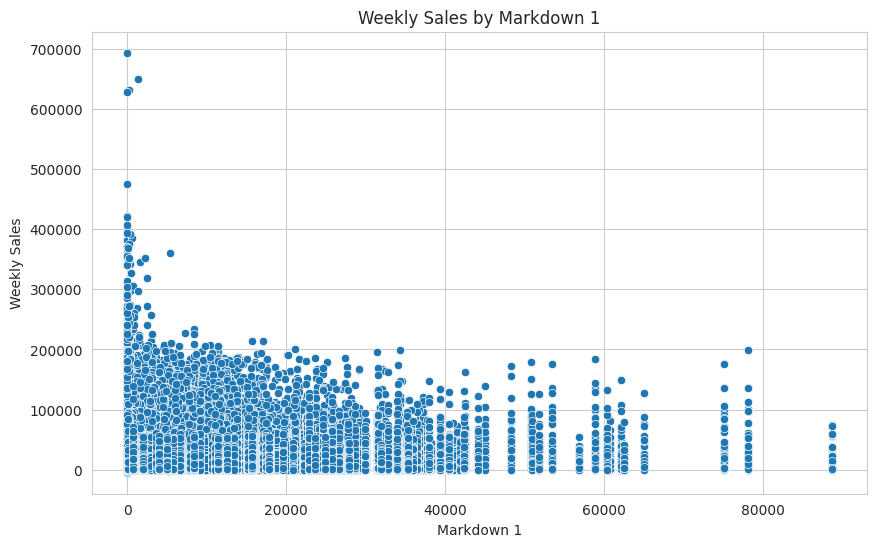

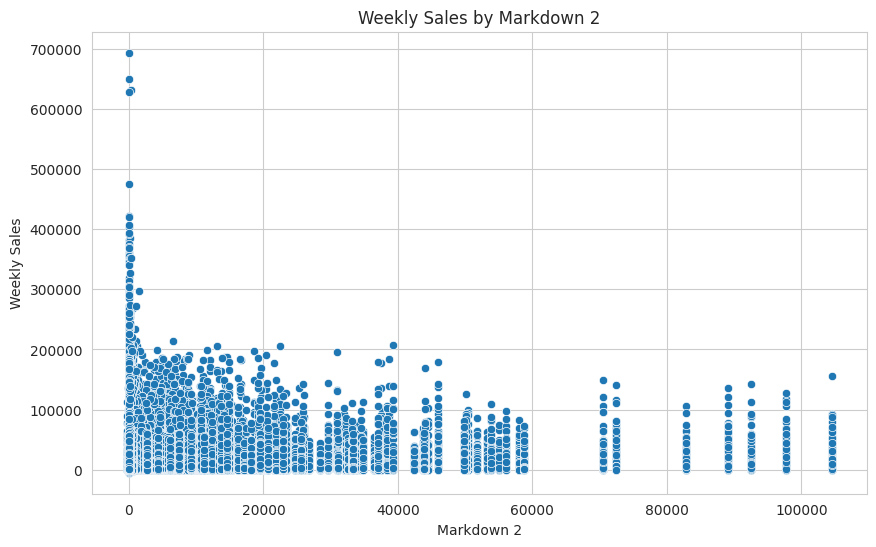

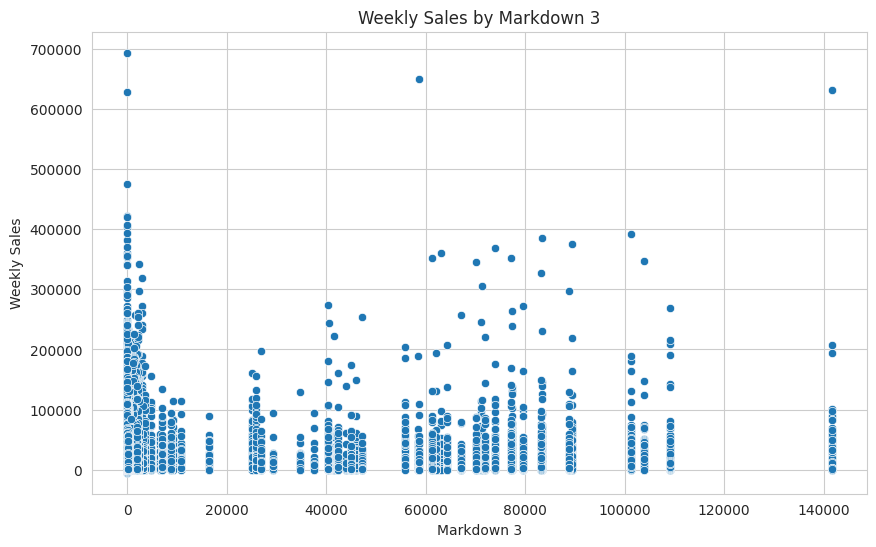

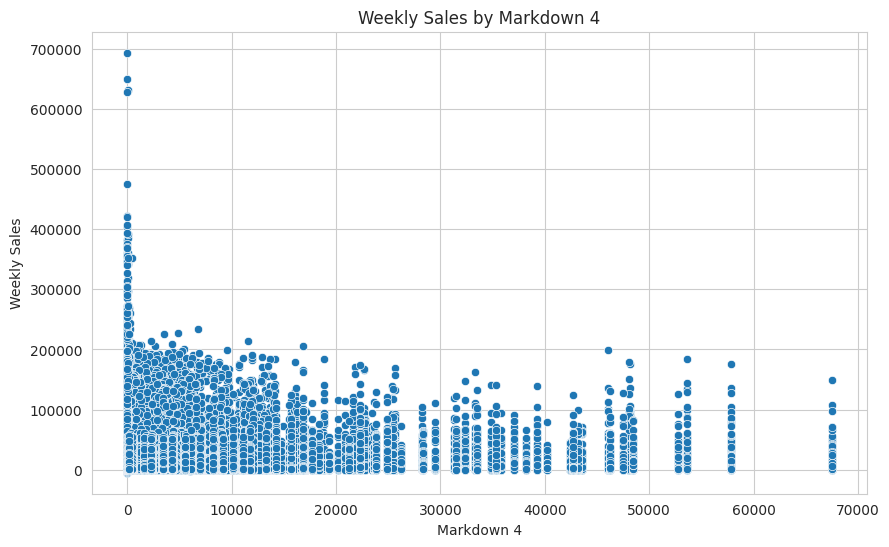

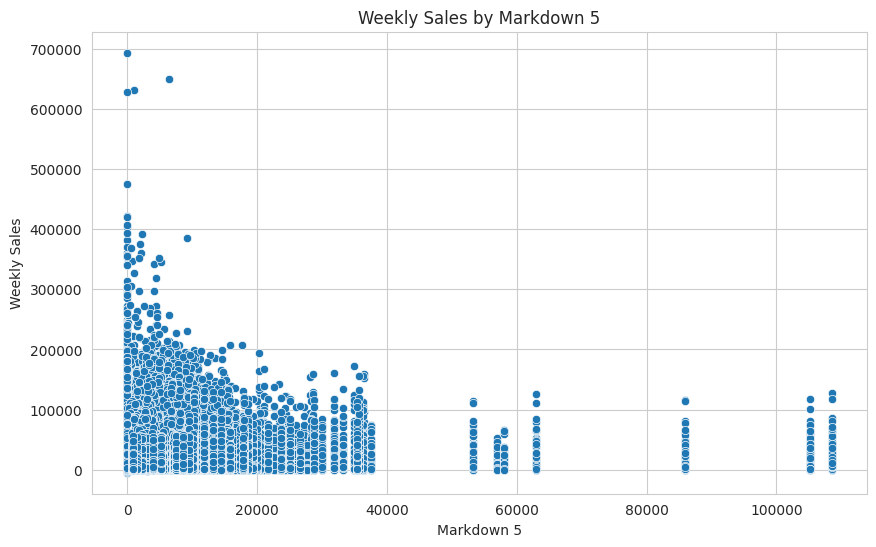

In [9]:
"""
Section: (8.5/20) Weekly sales by markdown features
"""
# plot weekly sales by markdown 1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MarkDown1', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Markdown 1')
plt.xlabel('Markdown 1')
plt.ylabel('Weekly Sales')
plt.show()

# plot weekly sales by markdown 2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MarkDown2', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Markdown 2')
plt.xlabel('Markdown 2')
plt.ylabel('Weekly Sales')
plt.show()

# plot weekly sales by markdown 3
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MarkDown3', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Markdown 3')
plt.xlabel('Markdown 3')
plt.ylabel('Weekly Sales')
plt.show()

#plot weekly sales by markdown 4
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MarkDown4', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Markdown 4')
plt.xlabel('Markdown 4')
plt.ylabel('Weekly Sales')
plt.show()

# plot weekly sales by markdown 5
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MarkDown5', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Markdown 5')
plt.xlabel('Markdown 5')
plt.ylabel('Weekly Sales')
plt.show()

## 8.6/20 Weekly sales by time

*   Weekly sales by `Year`
*   Weekly sales by `Month`
*   Weekly sales by `Day`
*   Weekly sales by `Week_Num`
*   Weekly sales by `IsHoliday`

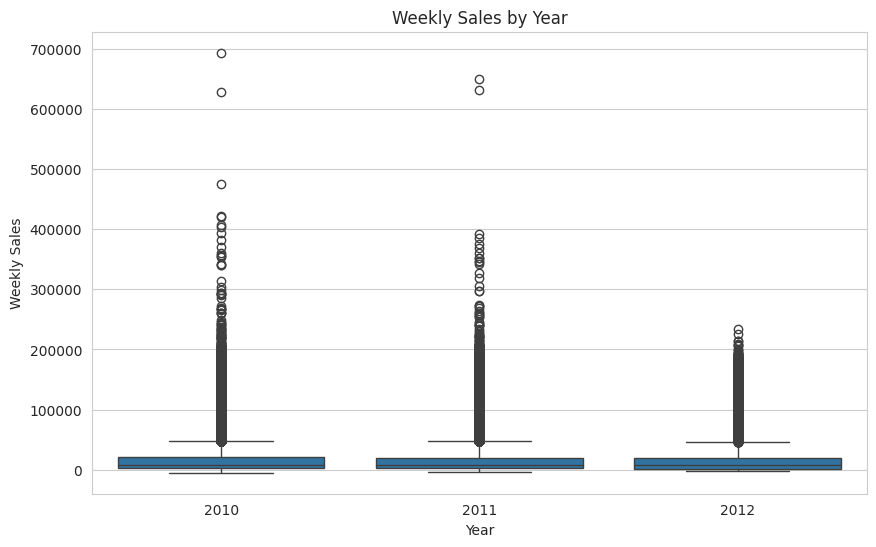

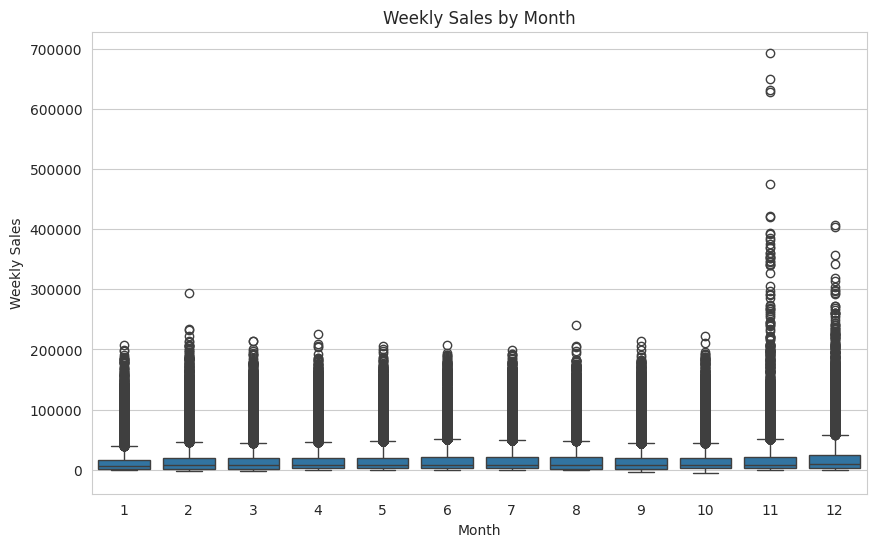

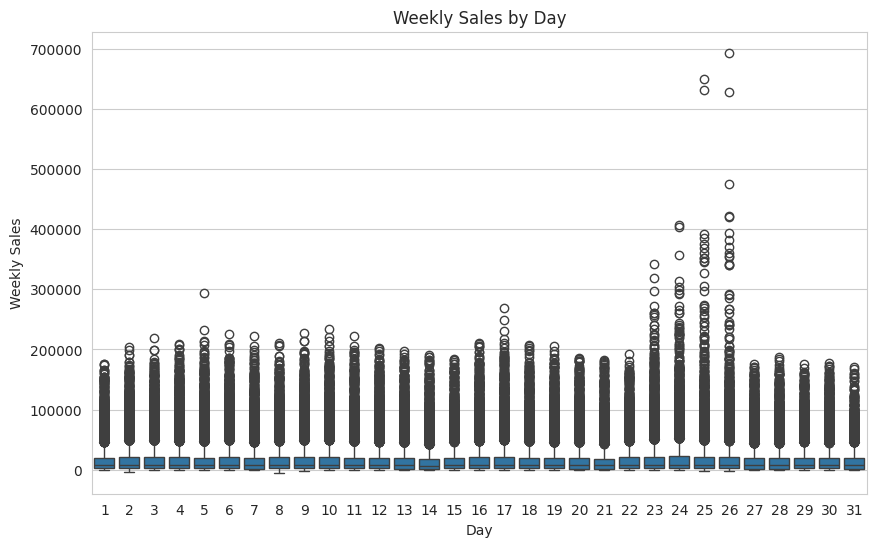

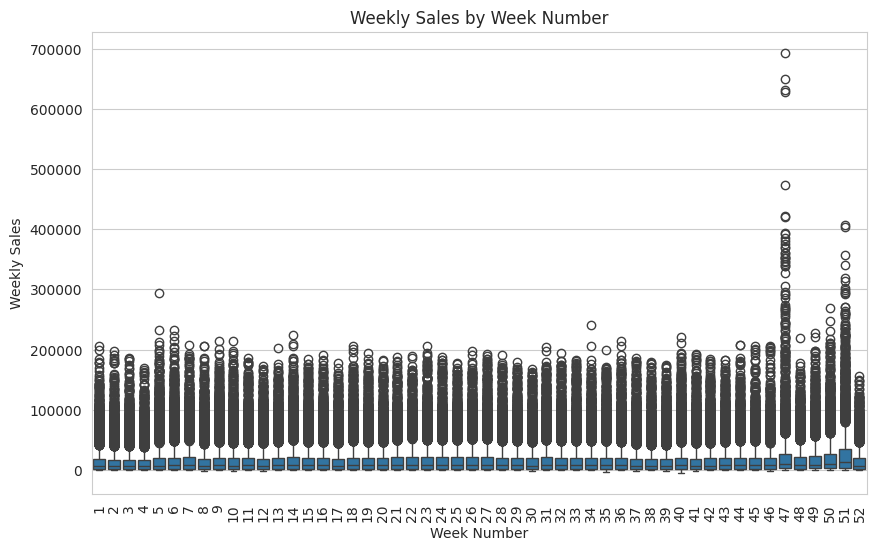

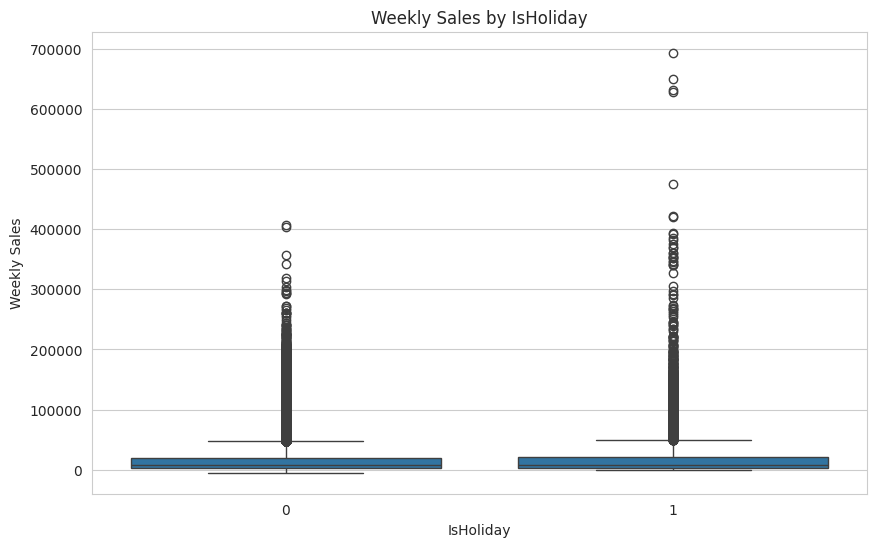

In [10]:
"""
Section: (8.5/20) Weekly sales by markdown features
"""
# decompose date into yyyy-mm-dd
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# decomponse date into week_num
df['Week_Num'] = df['Date'].dt.isocalendar().week.astype(int)

# plot weekly sales by year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Year')
plt.xlabel('Year')
plt.ylabel('Weekly Sales')
plt.show()

# plot weekly sales by month
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Month')
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.show()

# plot weekly sales by day
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Day')
plt.xlabel('Day')
plt.ylabel('Weekly Sales')
plt.show()

# plot weekly sales by week number
plt.figure(figsize=(10, 6))
sns.boxplot(x='Week_Num', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by Week Number')
plt.xlabel('Week Number')
plt.xticks(rotation=90)
plt.ylabel('Weekly Sales')
plt.show()

# plot weekly sales by isholiday
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title('Weekly Sales by IsHoliday')
plt.xlabel('IsHoliday')
plt.ylabel('Weekly Sales')
plt.show()

# (9/20) Feature Engineering & Selection
*final features & rationale*


## 9.1/ Identify and remove missing features

In [11]:
"""
Section: (9.1/20) Missing features
"""
# find missing values in df
print('\nMissing Values\n', df.isnull().sum())

# find na values in df
print('\nNaN Values\n', df.isna().sum())

# find duplicate rows in df
print('\nDuplicate Rows\n', df.duplicated().sum())


Missing Values
 Unnamed: 0      0
Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Day             0
Week_Num        0
dtype: int64

NaN Values
 Unnamed: 0      0
Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Day             0
Week_Num        0
dtype: int64

Duplicate Rows
 0


## 9.2/ Identify and remove outliers

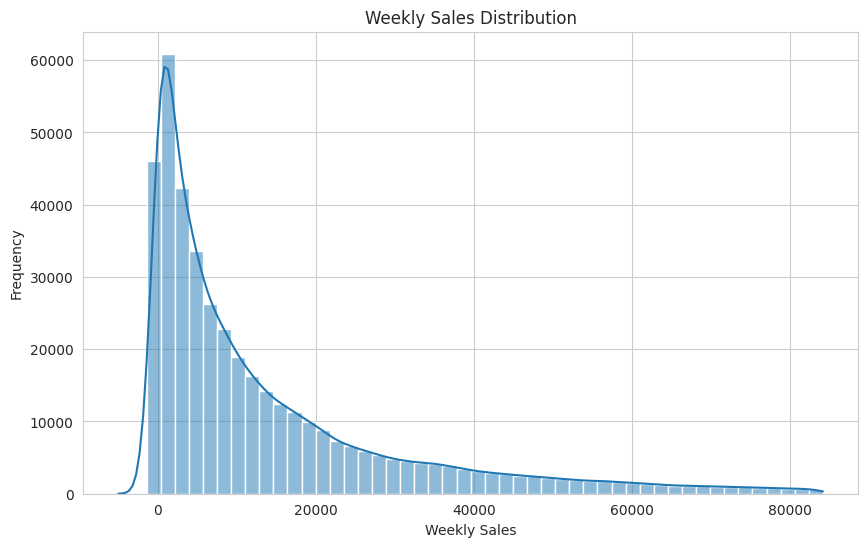

In [12]:
"""
Section: (9.1/20) Outliers
"""
# remove outliers
from scipy import stats
z_scores = stats.zscore(df['Weekly_Sales'])
df = df[(z_scores < 3)]

# print weekly sales distribution w/o outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title('Weekly Sales Distribution')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

## 9.3/ Set target for stores classified as high-performing

*   `Weekly_Sales` > median

In [13]:
"""
Section: (9.3/20) Classification target
"""
# set classification target for high_performing_store as weekly sales > median
high_performing_store = df['Weekly_Sales'].median()
df['high_performing_store'] = (df['Weekly_Sales'] > high_performing_store).astype(int)

# print median
print('\nMedian Weekly Sales\n', df['Weekly_Sales'].median())

# print classification target
print('\nClassification Target\n', df['high_performing_store'].value_counts())


Median Weekly Sales
 7295.49

Classification Target
 high_performing_store
0    206362
1    206360
Name: count, dtype: int64


## 9.4/ Feature selection of x, y for regression and classification

In [14]:
"""
Section: (9.3/20) Classification target
"""
# list columns
#print('\nColumns\n', df.columns)

# create x features for model inputs
x_input_features = ['Store', 'Type', 'Size', 'Dept',
                    'CPI', 'Fuel_Price', 'Temperature', 'Unemployment',
                    'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
                    'Year', 'Month', 'Day', 'Week_Num', 'IsHoliday']
x = df[x_input_features]

# create y targets for regression and classification model outputs
y_regression = df['Weekly_Sales']
y_classification = df['high_performing_store']

# print validation for x inputs and y targets
print('\nX Inputs\n', x.head())
print('\nY Regression\n', y_regression.head())
print('\nY Classification\n', y_classification.head())


X Inputs
    Store  Type    Size  Dept         CPI  Fuel_Price  Temperature  \
0      1     3  151315   1.0  211.096358       2.572        42.31   
1      1     3  151315  26.0  211.096358       2.572        42.31   
2      1     3  151315  17.0  211.096358       2.572        42.31   
3      1     3  151315  45.0  211.096358       2.572        42.31   
4      1     3  151315  28.0  211.096358       2.572        42.31   

   Unemployment  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  Year  \
0         8.106        0.0        0.0        0.0        0.0        0.0  2010   
1         8.106        0.0        0.0        0.0        0.0        0.0  2010   
2         8.106        0.0        0.0        0.0        0.0        0.0  2010   
3         8.106        0.0        0.0        0.0        0.0        0.0  2010   
4         8.106        0.0        0.0        0.0        0.0        0.0  2010   

   Month  Day  Week_Num  IsHoliday  
0      2    5         5          0  
1      2    5      

## 9.5/ Split data into training/test sets for regression and classification by 80/20

In [15]:
"""
Section: (9.5/20) 80/20 Splits for training/test sets
"""
# split x data into training and test sets for regression
from sklearn.model_selection import train_test_split
x_train_regression, x_test_regression, y_train_regression, y_test_regression = train_test_split(x, y_regression, test_size=0.2, random_state=42)

# split x data into training and test sets for classification
x_train_classification, x_test_classification, y_train_classification, y_test_classification = train_test_split(x, y_classification, test_size=0.2, random_state=42)

# print shapes of training/test sets
print('\nX Train Regression Shape\n', x_train_regression.shape)
print('\nX Test Regression Shape\n', x_test_regression.shape)
print('-----')
print('\nY Train Regression Shape\n', y_train_regression.shape)
print('\nY Test Regression Shape\n', y_test_regression.shape)
print('-----')
print('\nX Train Classification Shape\n', x_train_classification.shape)
print('\nX Test Classification Shape\n', x_test_classification.shape)
print('-----')
print('\nY Train Classification Shape\n', y_train_classification.shape)
print('\nY Test Classification Shape\n', y_test_classification.shape)


X Train Regression Shape
 (330177, 18)

X Test Regression Shape
 (82545, 18)
-----

Y Train Regression Shape
 (330177,)

Y Test Regression Shape
 (82545,)
-----

X Train Classification Shape
 (330177, 18)

X Test Classification Shape
 (82545, 18)
-----

Y Train Classification Shape
 (330177,)

Y Test Classification Shape
 (82545,)


## 9.6/ Preprocess categorical and numeric data

In [16]:
"""
Section: (9.6/20) Preprocess categorical and numeric data
"""
# separate categorical vs. numeric columns for feature scaling
categorical_cols = ['Store', 'Type', 'Dept', 'Year', 'Month', 'Day', 'Week_Num', 'IsHoliday']
numeric_cols = ['Size', 'CPI', 'Fuel_Price', 'Temperature', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# columntransformer to preprocess categorical and numeric data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

print('Preprocessing complete!')

Preprocessing complete!


# (10/20) ML Models Used
*all models evaluated (explain each)*



## 10.1/ Regression models

### 10.1.1/ Linear regression

In [17]:
"""
Section: (10.1.1/20) Simple linear regression
"""
# simple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# linear regression pipeline
from sklearn.pipeline import Pipeline
linear_regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

fit_linear_regression = linear_regression_pipeline.fit(x_train_regression, y_train_regression)
y_pred_linear_regression = fit_linear_regression.predict(x_test_regression)

print('\nLinear Regression Metrics\n')
print('Mean Squared Error:', mean_squared_error(y_test_regression, y_pred_linear_regression))
print('R2 Score:', r2_score(y_test_regression, y_pred_linear_regression))


Linear Regression Metrics

Mean Squared Error: 90569027.57979645
R2 Score: 0.682658956130431


### 10.1.2/ Ridge regression


In [18]:
"""
Section: (10.1.2/20) Ridge regression
"""
# ridge regression pipeline
from sklearn.linear_model import Ridge
ridge_regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

fit_ridge_regression = ridge_regression_pipeline.fit(x_train_regression, y_train_regression)
y_pred_ridge_regression = fit_ridge_regression.predict(x_test_regression)

print('\nRidge Regression Metrics\n')
print('Mean Squared Error:', mean_squared_error(y_test_regression, y_pred_ridge_regression))
print('R2 Score:', r2_score(y_test_regression, y_pred_ridge_regression))


Ridge Regression Metrics

Mean Squared Error: 90569867.04045287
R2 Score: 0.6826560147791976


### 10.1.3/ Decision tree regression

In [20]:
"""
Section: (10.1.3/20) Decision tree regression
"""
# decision tree regression pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
decision_tree_regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

fit_decision_tree_regression = decision_tree_regression_pipeline.fit(x_train_regression, y_train_regression)
y_pred_decision_tree_regression = fit_decision_tree_regression.predict(x_test_regression)

print('\nDecision Tree Regression Metrics\n')
print('Mean Squared Error:', mean_squared_error(y_test_regression, y_pred_decision_tree_regression))
print('R2 Score:', r2_score(y_test_regression, y_pred_decision_tree_regression))


Decision Tree Regression Metrics

Mean Squared Error: 10288177.828256458
R2 Score: 0.9639516821723836


## 10.2/ Classification models

### 10.2.1/ Logistic regression

In [28]:
"""
Section: (10.2.1/20) Logistic regression
"""
# logistic regression pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
logistic_regression_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

fit_logistic_regression = logistic_regression_pipeline.fit(x_train_classification, y_train_classification)
y_pred_logistic_regression = fit_logistic_regression.predict(x_test_classification)

print('\nLogistic Regression Metrics\n')
print('Accuracy Score:', accuracy_score(y_test_classification, y_pred_logistic_regression))
print('Precision Score:', precision_score(y_test_classification, y_pred_logistic_regression))
print('Recall Score:', recall_score(y_test_classification, y_pred_logistic_regression))
print('F1 Score:', f1_score(y_test_classification, y_pred_logistic_regression))


Logistic Regression Metrics

Accuracy Score: 0.8753891816584893
Precision Score: 0.8710351285806901
Recall Score: 0.8806778179699449
F1 Score: 0.87582993312248


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 10.2.2/ Random forest classifier

In [29]:
"""
Section: (10.2.2/20) Random forest classifier
"""
# random forest classifier pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
random_forest_classifier_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

fit_random_forest_classifier = random_forest_classifier_pipeline.fit(x_train_classification, y_train_classification)
y_pred_random_forest_classifier = fit_random_forest_classifier.predict(x_test_classification)

print('\nRandom Forest Classifier Metrics\n')
print('Accuracy Score:', accuracy_score(y_test_classification, y_pred_random_forest_classifier))
print('Precision Score:', precision_score(y_test_classification, y_pred_random_forest_classifier))
print('Recall Score:', recall_score(y_test_classification, y_pred_random_forest_classifier))
print('F1 Score:', f1_score(y_test_classification, y_pred_random_forest_classifier))


Random Forest Classifier Metrics

Accuracy Score: 0.9667211823853655
Precision Score: 0.9701594755894727
Recall Score: 0.9629287951251487
F1 Score: 0.966530612244898


# (11/20) Experiments
*major experiments conducted*


# (12/20) Evaluation Metrics
*performance with relevant metrics*

All evaluation scores for R2 and F1 scores are presented in Section 10.

# (13/20) Comparison Tables & Graphs
*model comparisons*

All evaluation scores for R2 and F1 scores are presented in Section 10.


# (14/20) Optimization Results
*hyperparameter tuning outcomes*

Not attempted


# (15/20) Testing Graphs
*final test performance and interpretation*

Not attempted


# (16/20) Standards & Constraints
*technical or ethical standards considered*

Following are among standards that were considered:

*   Store Type - 3 different formats of stores
*   Store Size - Stores of varying square footage
*   External - Weekly sales for same stores across weeks with varying external factors


# (17/20) Bias, Ethics, and Fairness
*reflection on model behavior*

Although the sample gathered observations across 45 stores across 3 formats, the ratio of observations for larger stores and impact of holiday weeks over a relatively short 2-year span could induce bias.


# (18/20) Limitations
*known issues or gaps*

*   Solution limitations - Not all applicable regression and classificaton models were sufficiently exercised in this project to formulate a robust POV

*   Competitive landscape - The scope of this analysis is limited to Walmart only. Dynamics due to competitor actions in terms of markdown/pricing along with other external factors are not captured.


# ~(19/20) Demo or Video (optional, encouraged)~

Not applicable


# (20/20) Conclusion & Future Work
*key takeaways and next steps*

The scope of this project was limited, especially for analysis with external factors such as competitor data/actions, impact of inventory constraints, etc. Factoring these variables would provide decision-makers with a more comprehensive dashboard.